# PREDICTING SURVIVORS - TITANIC

The "Titanic Project" is a common project among people who are starting in Machine Learning.
The goal of the project is to predict is a passenger survived.

The dataset was downloaded from Kaggle. https://www.kaggle.com/code/alexisbcook/titanic-tutorial
It has 891 rows and 12 columns.

In [1]:
# Necessary libraries

import numpy as np #linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # graph plots
import seaborn as sns # plots

%matplotlib inline


# basic styling for graphs
plt.style.use("seaborn-dark")
font = {"family": "Azeret Mono",
"weight": "bold",
"size": 14}

plt.rcParams.update({"font.family": font["family"], "font.weight": font["weight"], "font.size": font["size"]})

# loads data
data_train = pd.read_csv("data/00_titanic/train.csv")

# prepare the test set
data_test = pd.read_csv("data/00_titanic/test.csv")
data_test.info()

# take a glimpse at data
data_train.head()

/var/folders/r9/ggpr596s74x4hr8c_sfdzc580000gn/T/ipykernel_30084/3671959236.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data processing


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


/var/folders/r9/ggpr596s74x4hr8c_sfdzc580000gn/T/ipykernel_30084/3671959236.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-dark")


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1.1 Data Cleaning

Before I start playing, it's necessary to get my hands "dirty" by cleaning the data! 🧻


In [2]:
# get info about data
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From the data above, I can set my features (X arrays) and Y (labels). While the label will be logically column "Survived", for the features the values would be less obvious. Nevertheless some features are likely to bring little information in future predictions, such as the "name" the passenger, their ticket number, and.

I also see that there are some null values in Age, Cabin and Embarked, so I will proceed by filling them with a placeholder.

In [3]:
# check null values in data train
print(f"# of null values \n {data_train.isnull().sum()}")


# of null values 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
# check null values in test train
data_test.isna().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Checking the number of empty values above, I decided to treat them as following:

- Age: I will use an estimator, ( NOW I AM DROPPING)
- Cabin: I will create an additional label, as UNK
- Embarked: Since we have only two values, it's unlikely it will help. So I will drop them.

In [82]:
# fill null values with placeholder
data_train = data_train[data_train["Age"].notna()]

data_train["Cabin"] = data_train["Cabin"].fillna("UKN")
data_test["Cabin"] = data_test["Cabin"].fillna("UKN")


data_train["Embarked"] = data_train["Embarked"].dropna()

data_test = data_test[data_test["Age"].notna() & data_test["Fare"].notna()]

# +2 iterations on the number of features
# Name will be removed after the data engineering step
# Survived will be removed once we start the models, when we set y_train and y_test
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Cabin", "Name"]

X_train = data_train[features]
X_test = data_test[features]

# Adds "survivor to list of features"
X_train["Survived"] = data_train["Survived"]




/var/folders/r9/ggpr596s74x4hr8c_sfdzc580000gn/T/ipykernel_30084/3569020004.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["Survived"] = data_train["Survived"]


In [83]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin,Name,Survived
0,3,male,22.0,1,0,7.2500,S,UKN,"Braund, Mr. Owen Harris",0
1,1,female,38.0,1,0,71.2833,C,C85,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,3,female,26.0,0,0,7.9250,S,UKN,"Heikkinen, Miss. Laina",1
3,1,female,35.0,1,0,53.1000,S,C123,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
4,3,male,35.0,0,0,8.0500,S,UKN,"Allen, Mr. William Henry",0


## 1.2 Feature engineering

Now I will explore if some features could be created based on the interpreation of the situation. I found this to be an exciting step! You need to combine creativity with logical reasoning, common sense, and the subject knowledge.

This is a fairly simple dataset. After exploring the rows, I decided to create two new columns. 

- Family Fame: We can potentially argue that the family name has an influence on the survival chance of a person. If a family was considered prestigious, they could be more likely to survive.
- Number of family members: This was suggested by ChatGPT. I don't have any issues in admiting AI Agents are my friends during working from home (among my cats 🐱 🐱 🐱)


In [84]:
import re # regular expressions

# family members
# Add new feature using .loc to avoid SettingWithCopyWarning
X_train.loc[:, "N_Family_Members"] = X_train["SibSp"] + X_train["Parch"]
X_test.loc[:, "N_Family_Members"] = X_test["SibSp"] + X_test["Parch"]


# family name
# the condition is treated with regex
# "the first words that appear up the comma, in "Name" "
#def extract_family_name(name):
#    match = re.match(r'^([^,]+)', name)
#    if match:
#        return match.group(1)
#    else:
#        return "Uknown"

# extract the family name and create a new column
#X_train["Family_Name"] = X_train["Name"].apply(extract_family_name)
#X_test["Family_Name"] = X_test["Name"].apply(extract_family_name)



# reviews the training set, to check if everything looks good
X_train.head()

/var/folders/r9/ggpr596s74x4hr8c_sfdzc580000gn/T/ipykernel_30084/260034298.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[:, "N_Family_Members"] = X_train["SibSp"] + X_train["Parch"]
/var/folders/r9/ggpr596s74x4hr8c_sfdzc580000gn/T/ipykernel_30084/260034298.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[:, "N_Family_Members"] = X_test["SibSp"] + X_test["Parch"]


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin,Name,Survived,N_Family_Members
0,3,male,22.0,1,0,7.2500,S,UKN,"Braund, Mr. Owen Harris",0,1
1,1,female,38.0,1,0,71.2833,C,C85,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1
2,3,female,26.0,0,0,7.9250,S,UKN,"Heikkinen, Miss. Laina",1,0
3,1,female,35.0,1,0,53.1000,S,C123,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1
4,3,male,35.0,0,0,8.0500,S,UKN,"Allen, Mr. William Henry",0,0


In [85]:
# Now we drop "Name" since indivivual values won't help the model to learn any patterns
X_train = X_train.loc[:, X_train.columns != "Name"]
X_test = X_test.loc[:, X_test.columns != "Name"]

# Just checking... 
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pclass            714 non-null    int64  
 1   Sex               714 non-null    object 
 2   Age               714 non-null    float64
 3   SibSp             714 non-null    int64  
 4   Parch             714 non-null    int64  
 5   Fare              714 non-null    float64
 6   Embarked          712 non-null    object 
 7   Cabin             714 non-null    object 
 8   Survived          714 non-null    int64  
 9   N_Family_Members  714 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 77.5+ KB


## 1.3 Data Exploration

Some data vis to get familiar with the data. Supported by the graph below, the data tells us that:

- The data is normally distributed for Age, generally and considering the Survivors/Non-survivors
- The survival rate among individuals with the Sex as "Female" is higher than among individuals with the Sex as "Male".
- There is an increase in survival rate according to higher classes. Higher classes have a higher survival rate, while lower classes have a higher rate of non-survivors.
- Passengers of the higher classes have paid more for their fairs.
- **The P-class has the highest degree of association with the survival rate.**
- **Men died more than women**.The percetage of man who didn't survived is higher than the woman who survived.

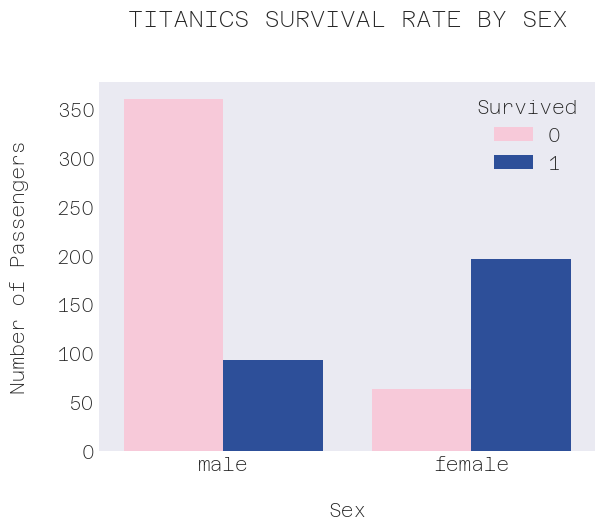

In [34]:
# Survival rate by Gender
sns.countplot(x=X_train["Sex"], hue= X_train[ "Survived"], palette={0: "#ffc1d6", 1: "#1b48ab"})
plt.xlabel("Sex", labelpad=20)
plt.ylabel("Number of Passengers", labelpad=20)
plt.title("TITANICS SURVIVAL RATE BY SEX", pad=40, fontweight='bold')
plt.show()

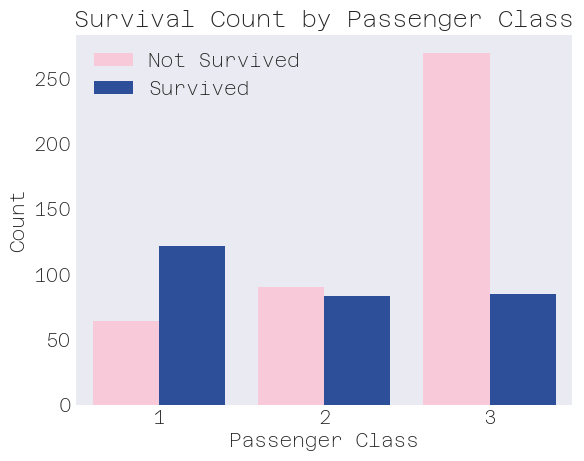

In [38]:
# Survival rate by Class
# Is the certain class more likely to survive than others?

sns.countplot(x="Pclass", hue="Survived", data=data_train, palette={0: "#ffc1d6", 1: "#1b48ab"})

plt.title("Survival Count by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(["Not Survived", "Survived"])
plt.show()

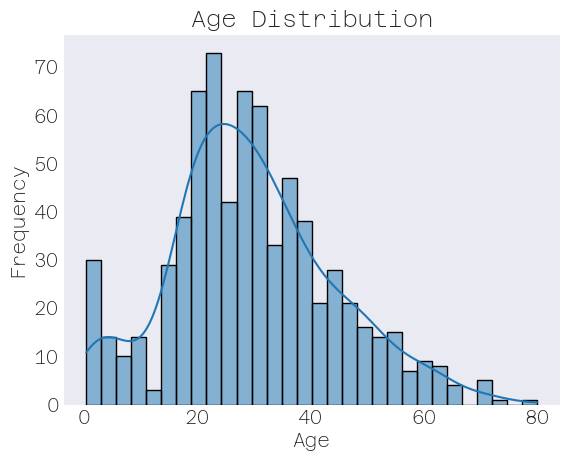

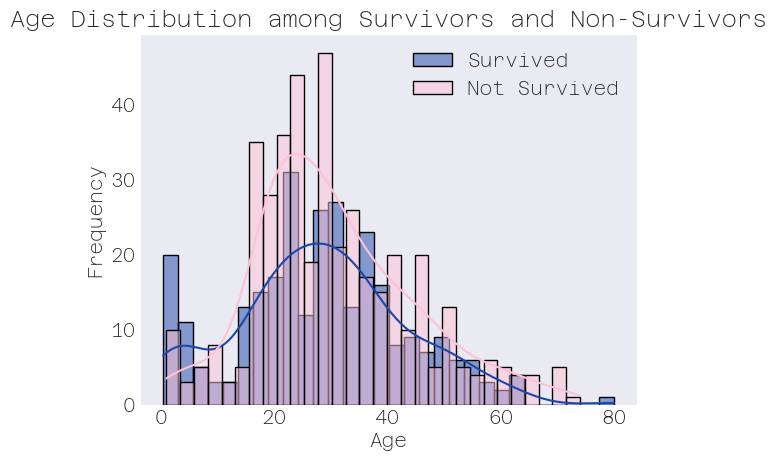

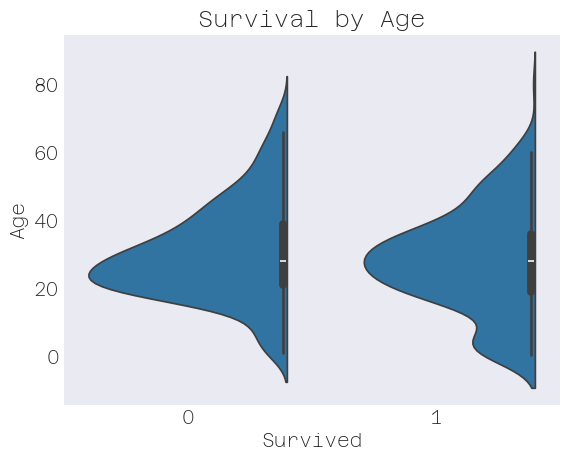

In [46]:
# Age Distribution
# Distribution plot of ages
sns.histplot(X_train['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Filter data for survivors and non-survivors
survived_data = X_train[X_train['Survived'] == 1]['Age'].dropna()
not_survived_data = X_train[X_train['Survived'] == 0]['Age'].dropna()

# Create distribution plots for survivors and non-survivors
sns.histplot(survived_data, bins=30, kde=True, color='#1b48ab', label='Survived')
sns.histplot(not_survived_data, bins=30, kde=True, color='#ffc1d6', label='Not Survived')

# Add labels and title
plt.title('Age Distribution among Survivors and Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Add legend
plt.legend()

# Show plot
plt.show()


# Survival rate by age
# Violin plot of age by survival
sns.violinplot(x='Survived', y='Age', data=X_train, split=True)
plt.title('Survival by Age')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

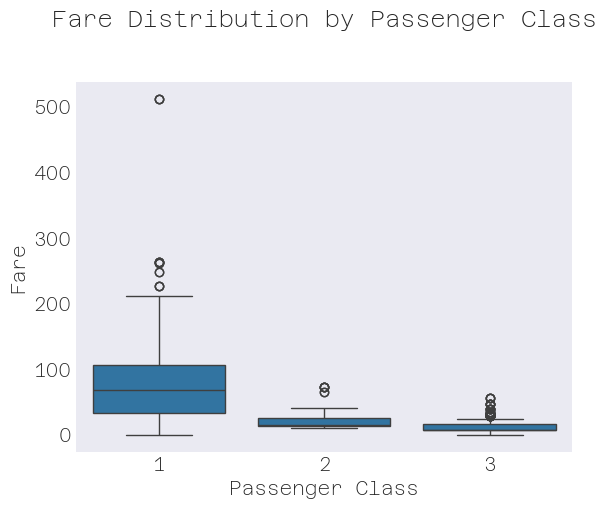

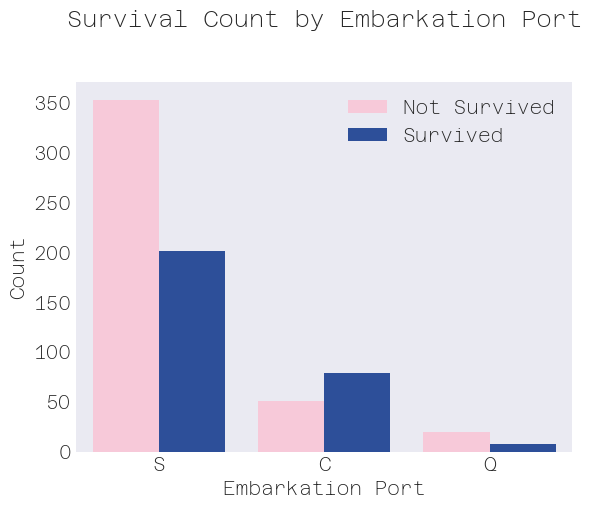

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


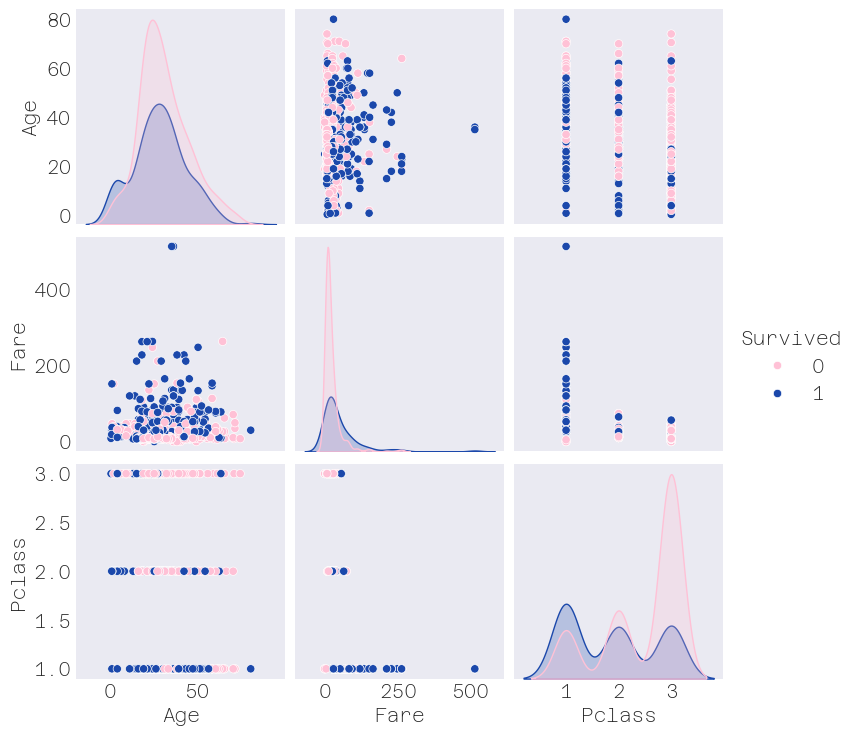

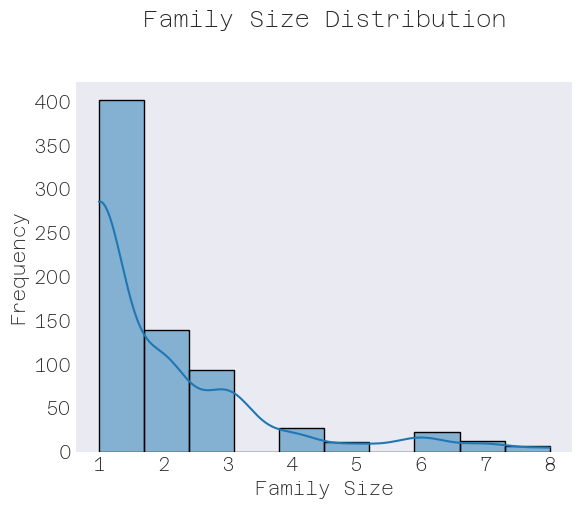

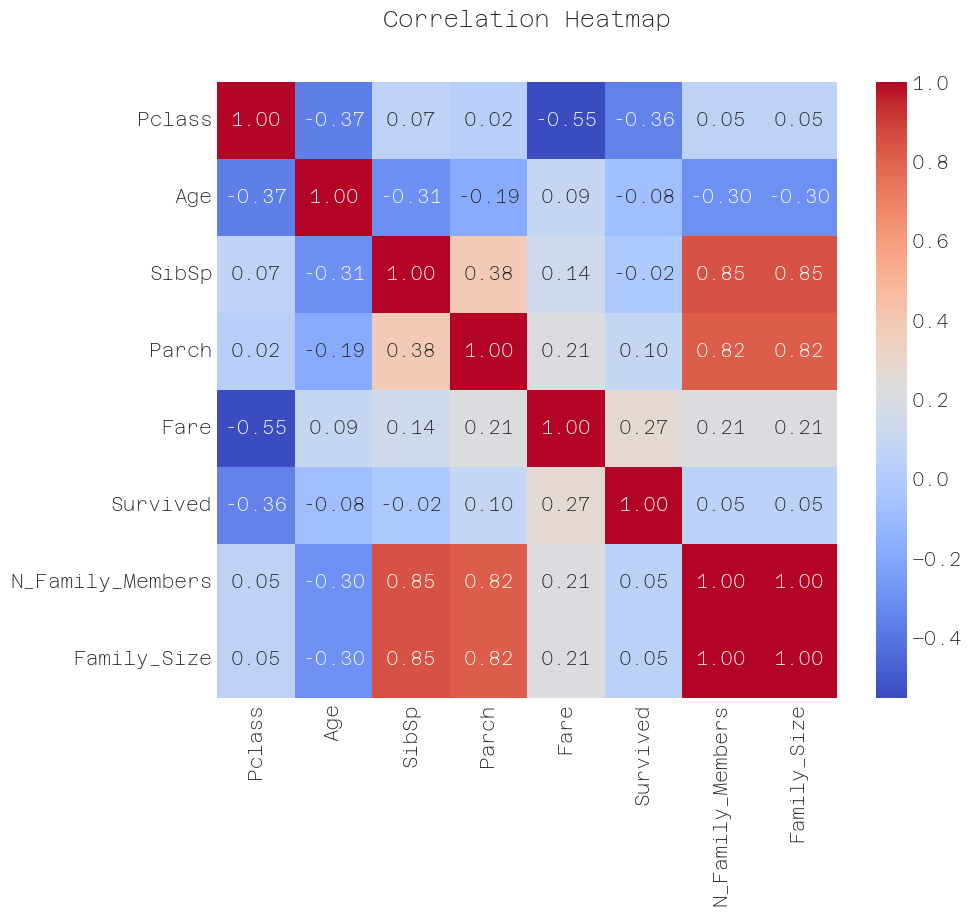

In [61]:
# Fare distribution by Class
# Box plot of fare by passenger class
sns.boxplot(x='Pclass', y='Fare', data=X_train)
plt.title('Fare Distribution by Passenger Class', pad=40)
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

# Survival Rate by Embarkation Port
# Count plot of survival by embarkation port
sns.countplot(x='Embarked', hue='Survived', data=X_train, palette={0: "#ffc1d6", 1: "#1b48ab"})
plt.title('Survival Count by Embarkation Port', pad=40)
plt.xlabel('Embarkation Port')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()


# Pairplot of Features
# Pairplot of selected features
sns.pairplot(X_train[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived', palette={0: "#ffc1d6", 1: "#1b48ab"})
plt.show()


# Family Size Distribution
# Create a new feature for family size
X_train['Family_Size'] = X_train['SibSp'] + X_train['Parch'] + 1

# Histogram of family size
sns.histplot(X_train['Family_Size'], bins=10, kde=True)
plt.title('Family Size Distribution', pad=40)
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.show()

# Correlation Heatmap

# Drop non-numeric columns
numeric_columns = X_train.select_dtypes(include=['number']).columns
X_train_numeric = X_train[numeric_columns]

# Calculate correlation matrix
correlation_matrix = X_train_numeric.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', pad=40)
plt.show()




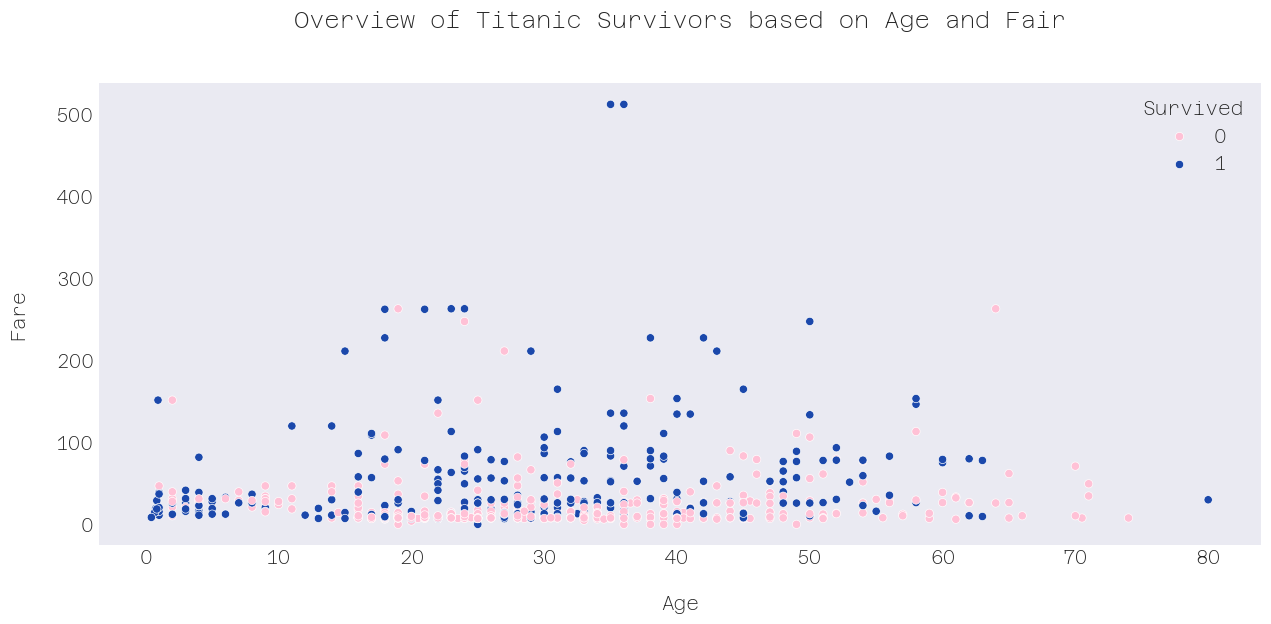

In [66]:
plt.figure(figsize=(15, 6))

# plot overview based on age and fair
sns.scatterplot(y=data_train["Fare"], x=data_train["Age"], hue=data_train["Survived"], palette={0: "#ffc1d6", 1: "#1b48ab"})

plt.xlabel("Age", labelpad=20)
plt.ylabel("Fare", labelpad=20)
plt.title("Overview of Titanic Survivors based on Age and Fair", pad=40)

plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


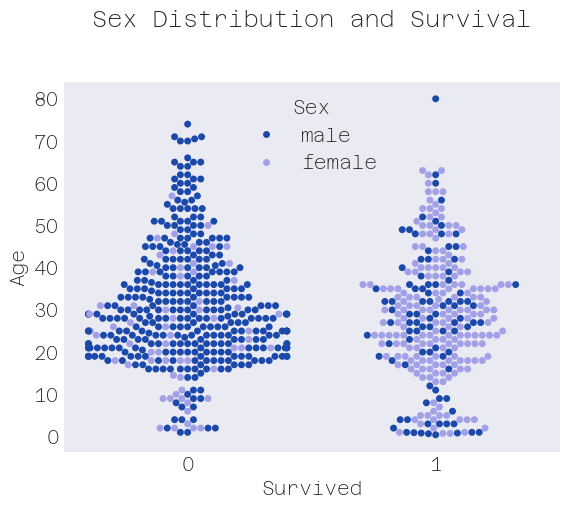

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


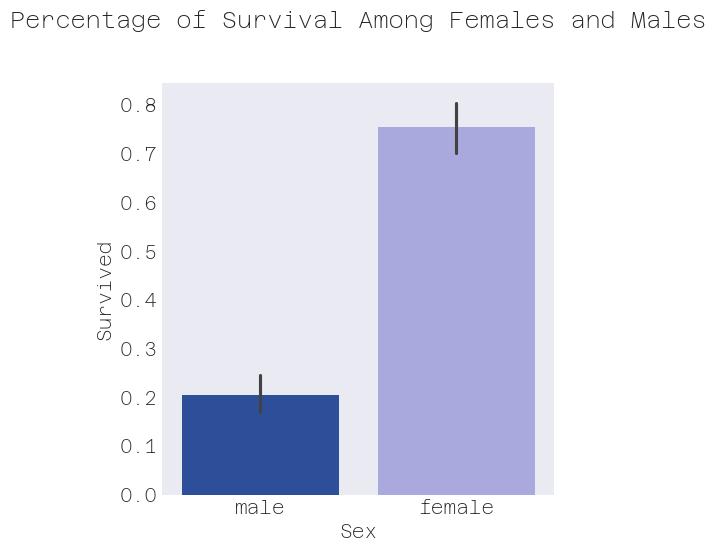

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


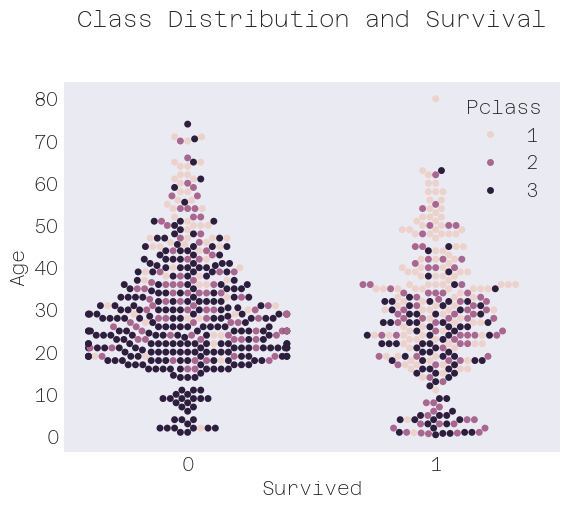

In [73]:
# with the swarm plot we can potentially see some clusters in the data
sns.swarmplot(x="Survived", y= "Age", hue="Sex", data=data_train, palette={"female": "#a2a0e7", "male": "#1b48ab"})
plt.title("Sex Distribution and Survival", pad=40)
plt.show()

sns.catplot(x = "Sex",y = "Survived",hue = "Sex", kind = "bar", data = data_train,
palette={"female": "#a2a0e7", "male": "#1b48ab", })
# Breakdown by gender within Survived category, )
plt.title("Percentage of Survival Among Females and Males", pad=40)
plt.show()

# class distribition and survival
sns.swarmplot(x="Survived", y= "Age", hue="Pclass", data=data_train)
plt.title("Class Distribution and Survival", pad=40)
plt.show()





## 1.4 Data Encoding

Next, I will move on by encoding the categorical variables. Before follow with the enconding, it is good to check if the data is consistent.

In [86]:
# check if data is consistent for all columns with object type - what will be enconded
print(X_train.info())
print(X_train.Sex.value_counts())
print(X_train.Embarked.value_counts())
print(X_train.Cabin.value_counts())


<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pclass            714 non-null    int64  
 1   Sex               714 non-null    object 
 2   Age               714 non-null    float64
 3   SibSp             714 non-null    int64  
 4   Parch             714 non-null    int64  
 5   Fare              714 non-null    float64
 6   Embarked          712 non-null    object 
 7   Cabin             714 non-null    object 
 8   Survived          714 non-null    int64  
 9   N_Family_Members  714 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 77.5+ KB
None
Sex
male      453
female    261
Name: count, dtype: int64
Embarked
S    554
C    130
Q     28
Name: count, dtype: int64
Cabin
UKN            529
C23 C25 C27      4
B96 B98          4
G6               4
F2               3
              ... 
C91              1
C124     

In [87]:
# encondes with get_dummies
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# check again
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,N_Family_Members,Sex_female,Sex_male,Embarked_C,...,Cabin_E77,Cabin_E8,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Cabin_T,Cabin_UKN
0,3,22.0,1,0,7.2500,0,1,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1,1,38.0,1,0,71.2833,1,1,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2,3,26.0,0,0,7.9250,1,0,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1,35.0,1,0,53.1000,1,1,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3,35.0,0,0,8.0500,0,0,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:



sns.histplot(x=data_train["Age"], hue=data_train["Survived"])
plt.show()

#sns.barplot(x=data_train["Survived"])




In [ ]:

for i in X_train:

    print(X_train[i].value_counts())
    print("-----------------------")

In [ ]:
X_train = pd.get_dummies(X_train, columns=["Pclass", "Sex", "Embarked"])

X_train.head()

## 1.5 *Machine Learning Models* 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train_model,  X_test_model, y_train_model, y_test_model = train_test_split(X_train, y_train)

model = RandomForestClassifier(n_estimators=100, max_depth=5)
model.fit(X_train_model, y_train_model)

print(model.score(X_test_model, y_test_model))

In [ ]:
# Simple Grid Search implementation
from sklearn.svm import SVC


best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train the SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train_model, y_train_model)

        #evaluate on the test set
        score = svm.score(X_test_model, y_test_model)

        print(f"Gamma = {gamma} | C = {C} ||| Score = {score}")

        if score > best_score:
            best_score = score
            best_parameters = {'C': C, "Gamma": gamma}

print(f"\n BEST SCORE: {best_score:.2f}")
print(f"BEST PARAMETERS: {best_parameters}")

Further exploration and questions

- Does the features I created helped the model?
